# Breast_Cancer_Wisconsin_(Diagnostic)_Data_Set

### Introduction:
Our organization is embarking on a project that aims to utilize the Breast Cancer Wisconsin (Diagnostic) Data Set to develop a machine learning-based diagnostic tool for breast cancer. Breast cancer is a significant health concern worldwide, and early and accurate diagnosis plays a critical role in improving patient outcomes. The dataset we are working with contains a range of features related to tumor characteristics, and by analyzing this data, we aim to create a valuable tool for healthcare professionals.

- Our primary goal is to develop a diagnostic model that can accurately distinguish between malignant (M) and benign (B) breast tumors using the provided attributes, including radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

- Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)

- a) radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry
- j) fractal dimension ("coastline approximation" - 1)

- Find out the correlation between cancer radius, texture,parimeter, compactness, etc and whether the cancer is malignant(M) or    benign(B).
- Upon finding out their correlation, find the relationship between these variables and whether the cancer is malignant or benign.

# Problem Statement

- Breast cancer is one of the most prevalent forms of cancer affecting women worldwide. Early and accurate detection plays a critical role in improving patient outcomes and survival rates. However, conventional diagnostic methods have limitations, and there is a need for more effective and efficient approaches. This problem aims to develop a machine learning model that can accurately classify breast cancer cases as malignant or benign based on various features

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data=pd.read_csv(r"C:\Users\situ\Desktop\EDA project\data.csv")
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# In this data set there is a unnamed column which is not required & also id column is not required so i am dropping unnamed columns & id columns

In [4]:
df=data.drop(columns=['id','Unnamed: 32'])
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

# Type Checking 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

- Here all d-types are right 

# For null value

In [6]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

- Here there is no missing value

# For Duplicates 

In [7]:
df.duplicated().sum()

0

- here no duplicates are present

# Here is the clean data set

In [8]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# How many unique value present in diagnosis columns

In [10]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [11]:
df.shape

(569, 31)

In [12]:
df.describe().T.style.background_gradient(cmap='RdBu_r')

- this data set contains 569 rows/index & 31 columns

# Exploratory data analysis (EDA)

-  it used for analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

In [13]:
x=df['diagnosis'].value_counts()
x

B    357
M    212
Name: diagnosis, dtype: int64

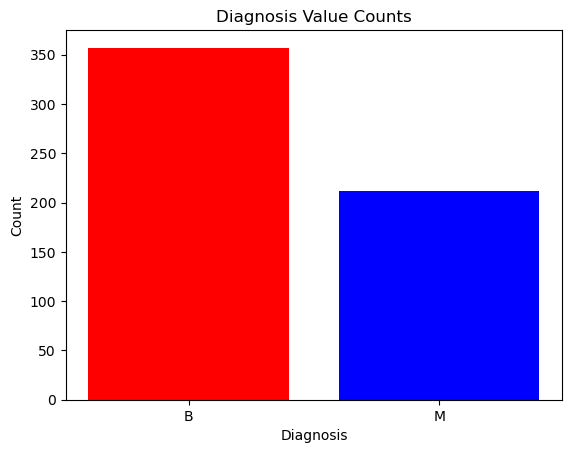

In [14]:
x=df['diagnosis'].value_counts()
plt.bar(x.index, x.values,color=['red','blue'])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis Value Counts')
plt.show()

- In this bar chart, the given data shows that there are more patients with benign diagnoses than malignant diagnoses.

# Pie chart

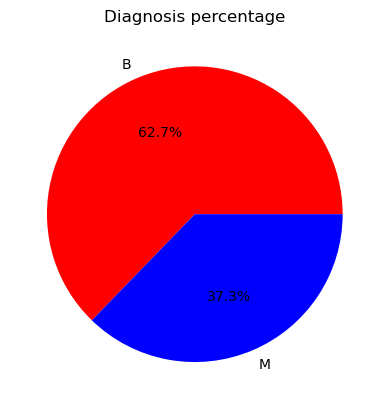

In [15]:
plt.pie(x,labels=x.index,colors=['red','blue'], autopct='%1.1f%%')
plt.title('Diagnosis percentage')
plt.show()

- In this pie chart, the percentage of patients with benign diagnoses is greater than that of malignant diagnoses.

In [16]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# plot for Mean

In [17]:
col_mean=['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
meandata=df[col_mean]
meandata

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  
0           0.2419                 0.07871  
1           0.1812                 0.05667  
2           0.2069                 0.05999  
3           0.2597                 0.09744  
4           0.1809                 0.05883  
..             ...                     ...  
564         0.1726                 0.05623  
565         0.1752                 0.05533  
566         0.1590                 0.05648  
567         0.2397                 0.07016  
568         0.1587                 0.05884  

[569 rows x 11 columns]

# Histogram

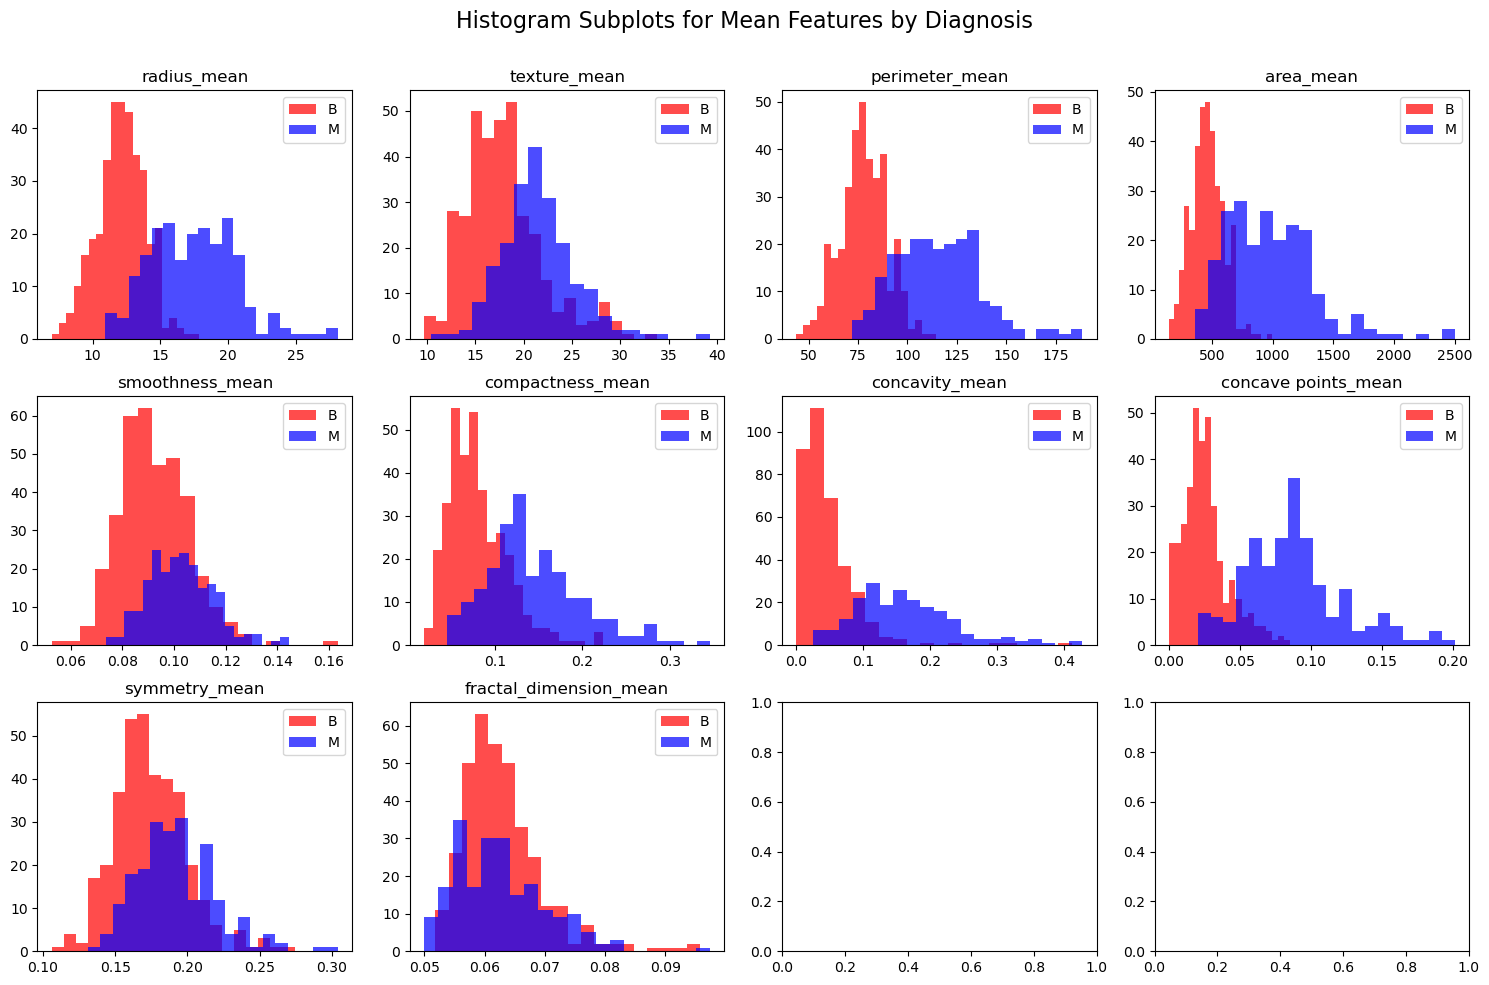

In [18]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Histogram Subplots for Mean Features by Diagnosis", fontsize=16)
colors = {'B': 'red', 'M': 'blue'}

for i, col in enumerate(meandata.columns[1:]):
    row = i // 4
    col_num = i % 4

    for diagnosis, color in colors.items():
        subset = meandata[meandata['diagnosis'] == diagnosis]
        axs[row, col_num].hist(subset[col], bins=20, color=color, alpha=0.7, label=diagnosis)

    axs[row, col_num].set_title(col)
    axs[row, col_num].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


# Insites:-

- In radius mean plot we can see benign tumor value lies 5-18, where as malignant tumor value lies on 12-28. we can say if the radius value is greter than 15 then that patient has 90% chance of maligant tumor.

- In texture mean plot we can see benign tumor value lies 10-30, where as malignant tumor value lies on 11-40.here we can not say if that patient has benign tumor or maligant tumor.

- In perimeter mean plot we can see benign tumor value lies 40-120, where as malignant tumor value lies on 70-180. we can say if the perimeter value is greter than 115 then that patient has 90% chance of maligant tumor.

- In area mean plot we can see benign tumor value lies 100-900, where as malignant tumor value lies on 350-2500. we can say if the radius value is greter than 650 then that patient has 90% chance of maligant tumor.

- In soomthness mean plot we can see benign tumor value lies 0.05-0.16, where as malignant tumor value lies on 0.07-0.14. we can not if that patient has benign tumor or maligant tumor.

- In compactness mean plot we can see benign tumor value lies 0.03-0.2, where as malignant tumor value lies on 0.07-0.4. we can say if the compactness value is greter than 0.13 then that patient has 90% chance of maligant tumor.

- In concavity mean plot we can see benign tumor value lies 0.0-0.18, where as malignant tumor value lies on 0.03-0.4. we can say if the concavity value is greter than 0.1 then that patient has 90% chance of maligant tumor.

- In concavepoints mean plot we can see benign tumor value lies 0.0-0.058, where as malignant tumor value lies on 0.25-0.20. we can say if the compactness value is greter than 0.20 then that patient has 90% chance of maligant tumor.


- In Symmetry mean plot we can see benign tumor value lies 0.11-0.27, where as malignant tumor value lies on 0.13-0.31. here we can not say if that patient has benign tumor or maligant tumor.

- In fractional dimension mean plot we can see benign tumor value lies 0.06-0.11, where as malignant tumor value lies on 0.05-0.13.  here we can not say if that patient has benign tumor or maligant tumor.

# Pair plot

<Figure size 1000x800 with 0 Axes>

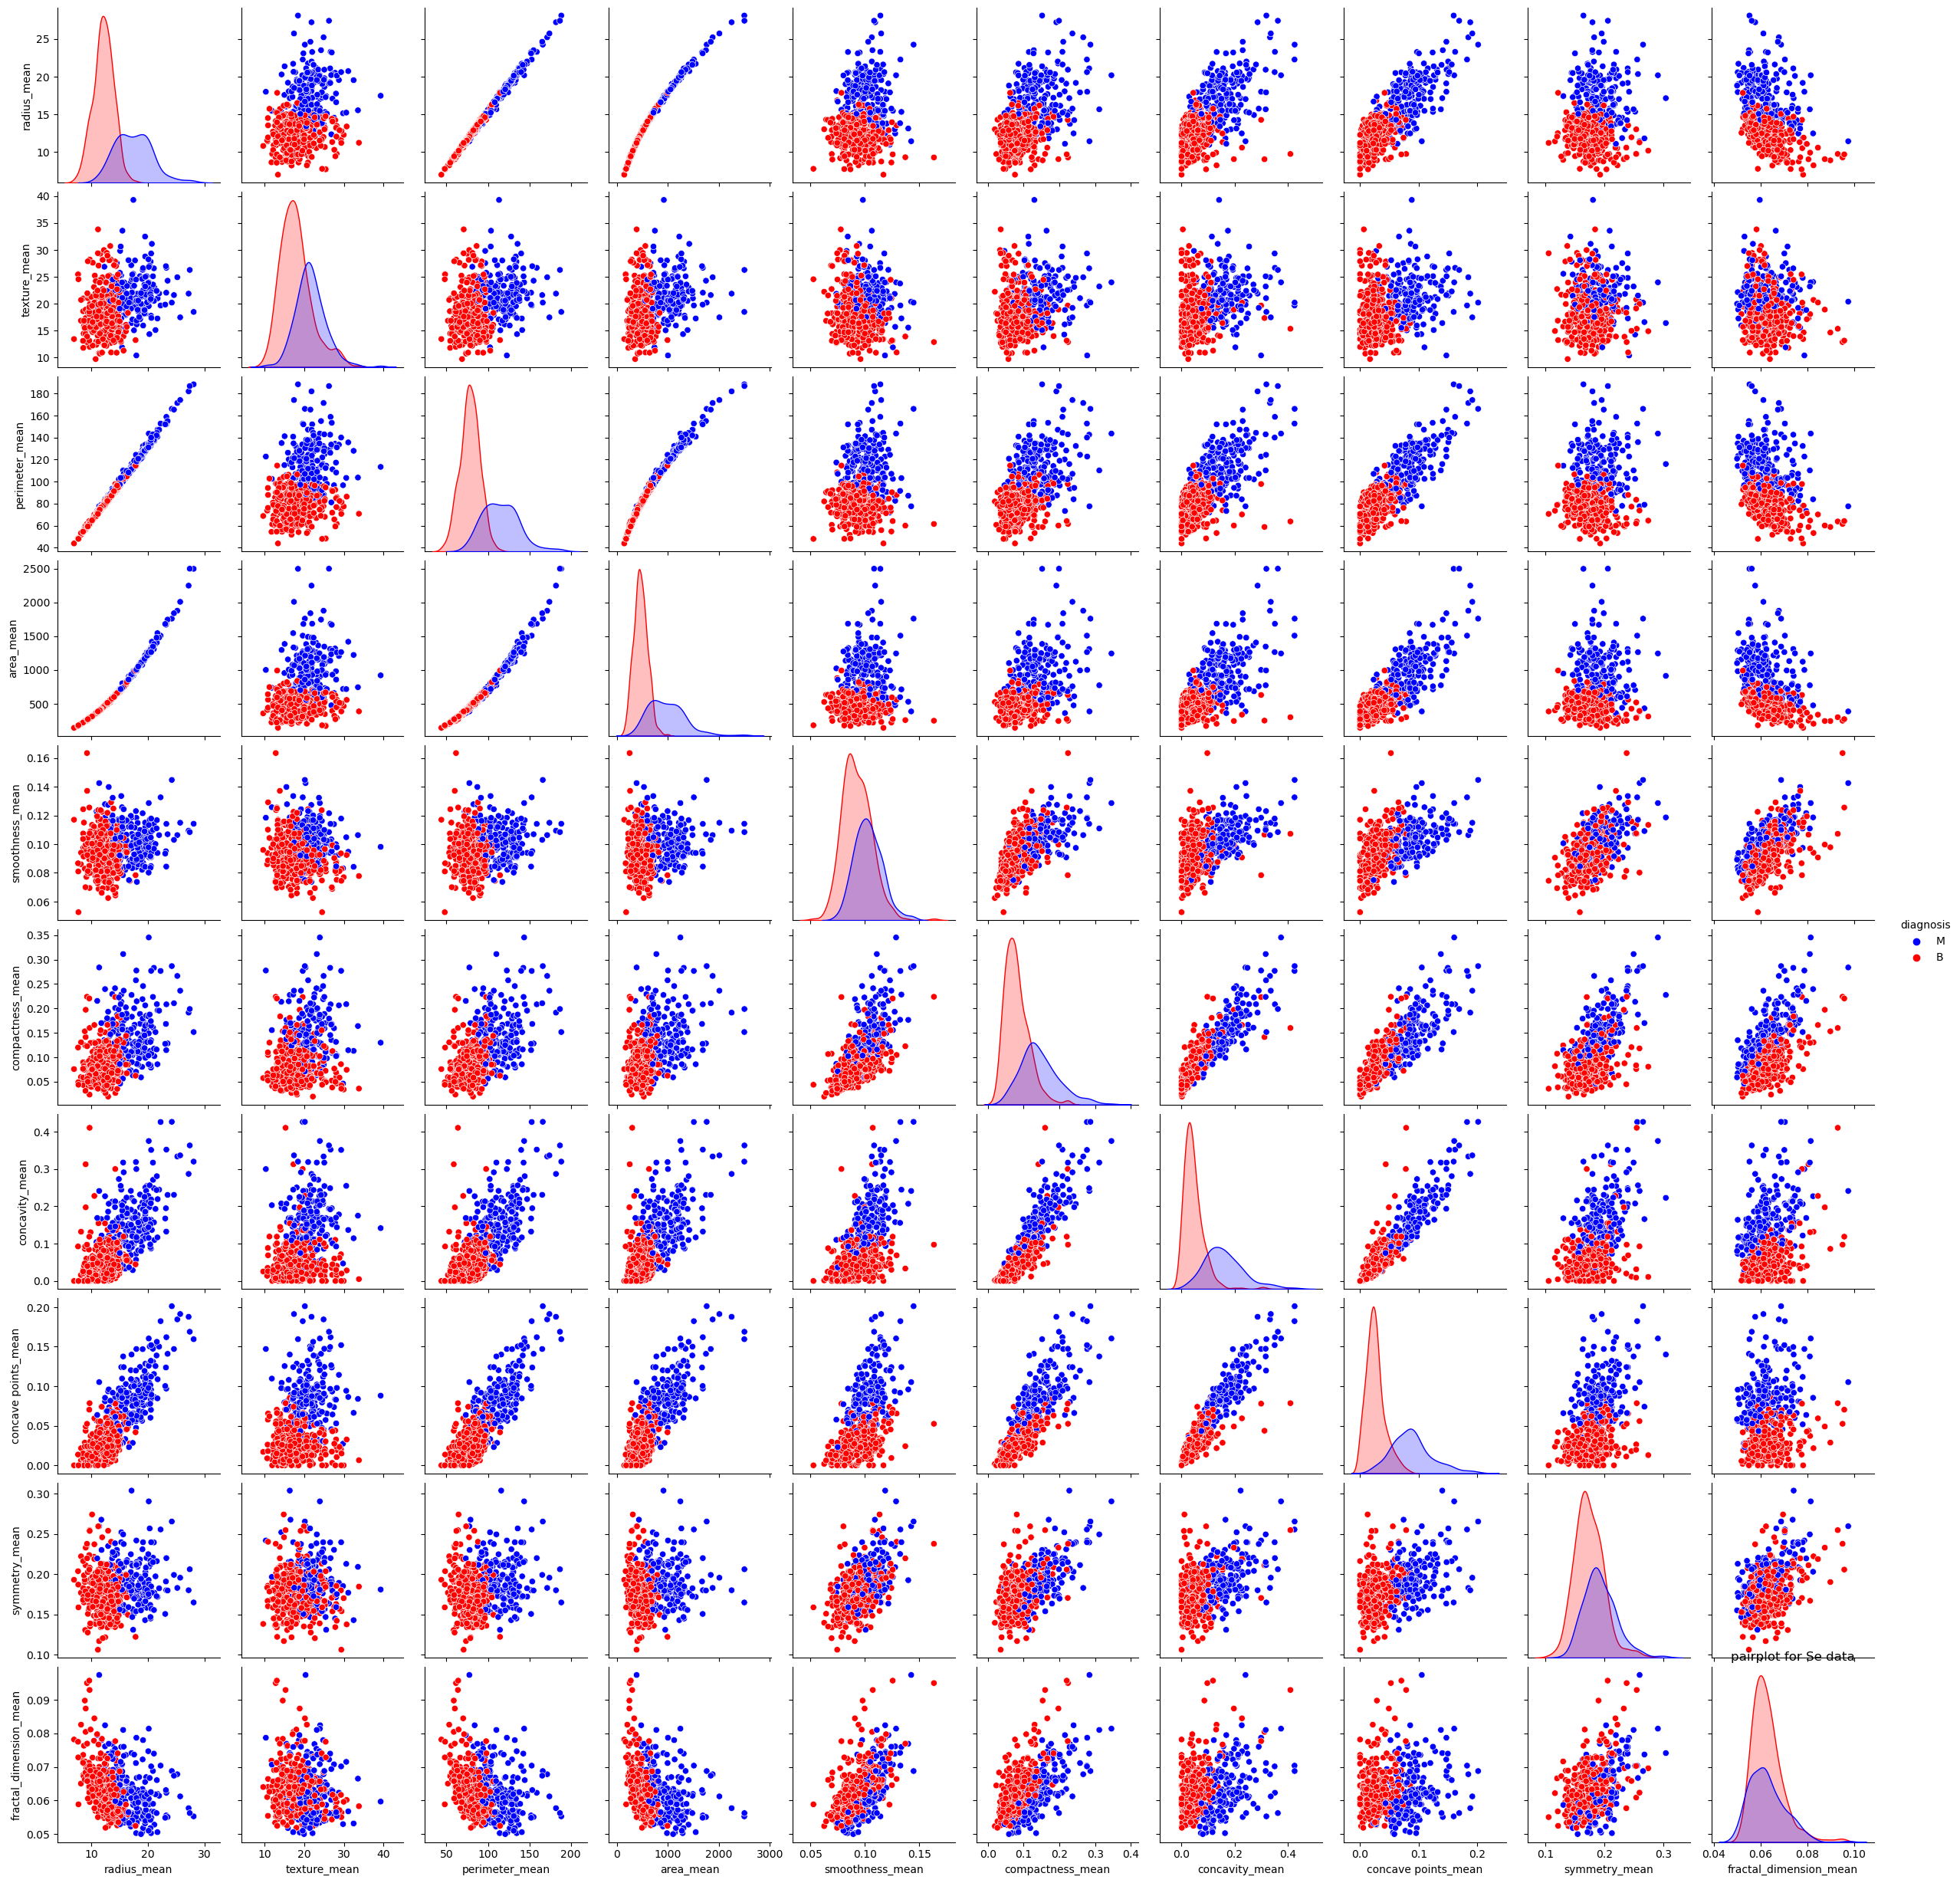

In [19]:
custom_palette = {'B': 'red', 'M': 'blue'}
plt.figure(figsize=(10, 8))
sns.pairplot(meandata,hue='diagnosis',palette=custom_palette)
plt.title("pairplot for Se data")
plt.show()

# Insites:-

- in this plot we can see that malignant tumour of radius mean  seems to have longer range except for fractal dimension.

- the peak for malignant tumour seems to appear more on the right as compared to benign tumours.

- This means that malignant tumour tend to have larger radius, rougher texture, more compactness,concavity and concave points.

# Heat Map for Mean data

C:\Users\situ\AppData\Local\Temp\ipykernel_15736\3278114328.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(meandata.corr(),cmap='RdBu_r',annot=True)


<Axes: >

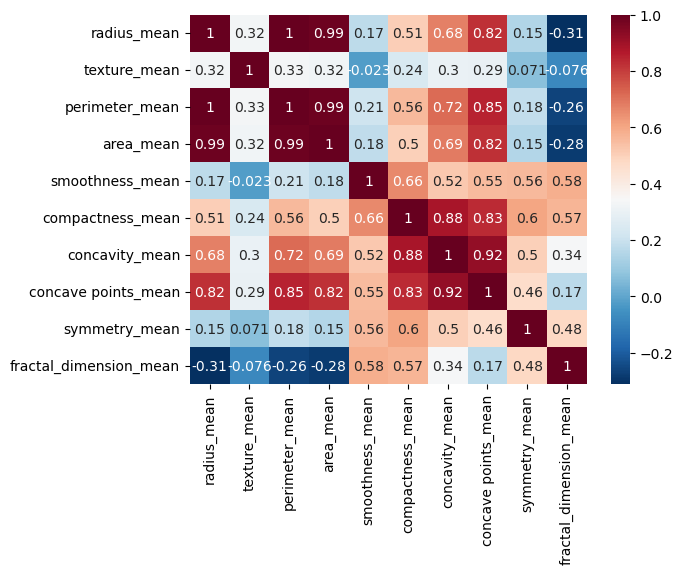

In [20]:

sns.heatmap(meandata.corr(),cmap='RdBu_r',annot=True)

# Insites:-

- The mean data has strong positive correlation with mean values of radius and perimeter.
- Some perimeter are moderately positive corelated with concavity and area, concavity and perimeter etc.
- We see some strong negative correlation between fractal dimension with radius, texture, parameter mean values.


# plot for Se data

In [21]:
col_se=['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']
sedata=df[col_se]
sedata

diagnosis  radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
0           M     1.0950      0.9053         8.589   153.40       0.006399   
1           M     0.5435      0.7339         3.398    74.08       0.005225   
2           M     0.7456      0.7869         4.585    94.03       0.006150   
3           M     0.4956      1.1560         3.445    27.23       0.009110   
4           M     0.7572      0.7813         5.438    94.44       0.011490   
..        ...        ...         ...           ...      ...            ...   
564         M     1.1760      1.2560         7.673   158.70       0.010300   
565         M     0.7655      2.4630         5.203    99.04       0.005769   
566         M     0.4564      1.0750         3.425    48.55       0.005903   
567         M     0.7260      1.5950         5.772    86.22       0.006522   
568         B     0.3857      1.4280         2.548    19.15       0.007189   

     compactness_se  concavity_se  concave points_se  symmetry_se  \
0           0.04904       0.05373            0.01587      0.03003   
1           0.01308       0.01860            0.01340      0.01389   
2           0.04006       0.03832            0.02058      0.02250   
3           0.07458       0.05661            0.01867      0.05963   
4           0.02461       0.05688            0.01885      0.01756   
..              ...           ...                ...          ...   
564         0.02891       0.05198            0.02454      0.01114   
565         0.02423       0.03950            0.01678      0.01898   
566         0.03731       0.04730            0.01557      0.01318   
567         0.06158       0.07117            0.01664      0.02324   
568         0.00466       0.00000            0.00000      0.02676   

     fractal_dimension_se  
0                0.006193  
1                0.003532  
2                0.004571  
3                0.009208  
4                0.005115  
..                    ...  
564              0.004239  
565              0.002498  
566              0.003892  
567              0.006185  
568              0.002783  

[569 rows x 11 columns]

# Histogram

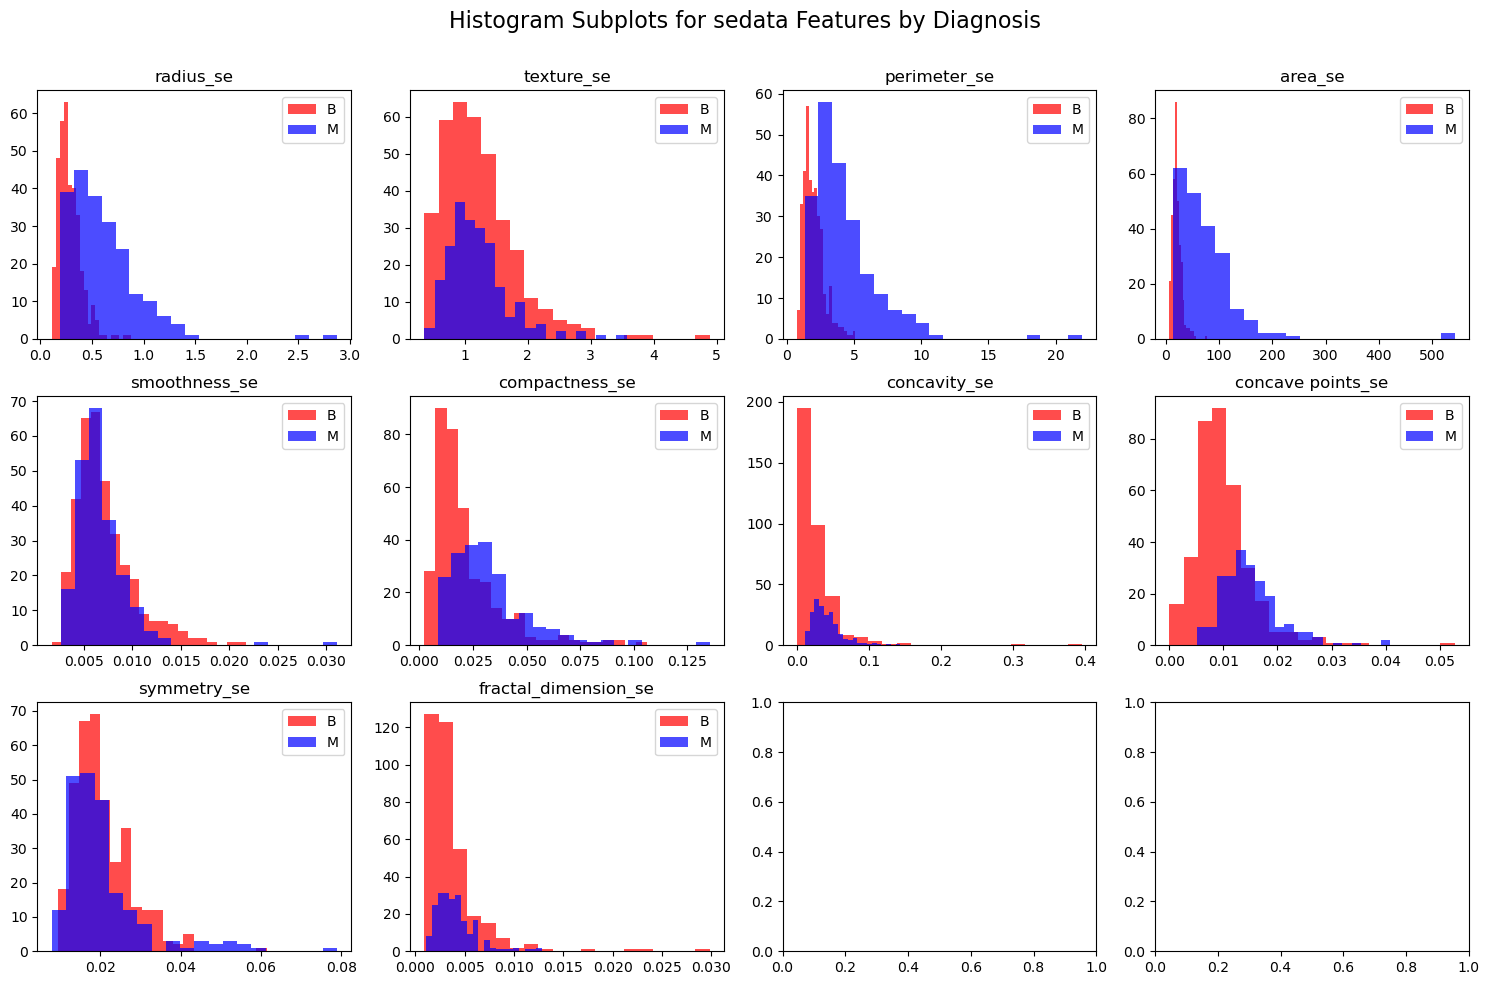

In [22]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Histogram Subplots for sedata Features by Diagnosis", fontsize=16)
colors = {'B': 'red', 'M': 'blue'}

for i, col in enumerate(sedata.columns[1:]):
    row = i // 4
    col_num = i % 4

    for diagnosis, color in colors.items():
        subset = sedata[sedata['diagnosis'] == diagnosis]
        axs[row, col_num].hist(subset[col], bins=20, color=color, alpha=0.7, label=diagnosis)

    axs[row, col_num].set_title(col)
    axs[row, col_num].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


# Insites:-

- In radius se plot we can see benign tumor value lies 0.2-0.9, where as malignant tumor value lies on 0.5-1.6. we can say if the radius value is greter than 0.6 then that patient has 90% chance of maligant tumor.

- In texture se plot we can see benign tumor value lies 0.4-4.9, where as malignant tumor value lies on 0.4-3.5.here we can not say if that patient has benign tumor or maligant tumor.

- In perimeter se plot we can see benign tumor value lies 2-5, where as malignant tumor value lies on 3-12. we can say if the perimeter value is greter than 5 then that patient has 90% chance of maligant tumor.

- In area se plot we can see benign tumor value lies 10-80, where as malignant tumor value lies on 20-240. we can say if the radius value is greter than 60 then that patient has 90% chance of maligant tumor.

- In soomthness se plot we can see benign tumor value lies 0.002-0.014, where as malignant tumor value lies on 0.004-0.031. we can not say if that patient has benign tumor or maligant tumor.

- In compactness se plot we can see benign tumor value lies 0.002-0.101, where as malignant tumor value lies on 0.015-0.126. we can not say if that patient has benign tumor or maligant tumor.

- In concavity se plot we can see benign tumor value lies 0.0-0.18, where as malignant tumor value lies on 0.03-0.15.  we can not say if that patient has benign tumor or maligant tumor.

- In concavepoints se plot we can see benign tumor value lies 0.0-0.05, where as malignant tumor value lies on 0.005-0.04.we can not say if that patient has benign tumor or maligant tumor.

- In Symmetry se plot we can see benign tumor value lies 0.01-0.045, where as malignant tumor value lies on 0.015-0.08. here we can not say if that patient has benign tumor or maligant tumor.

- In fractional dimension mean plot we can see benign tumor value lies 0.001-0.11, where as malignant tumor value lies on 0.05-0.13.  here we can not say if that patient has benign tumor or maligant tumor.

# Pair plot

<Figure size 1000x800 with 0 Axes>

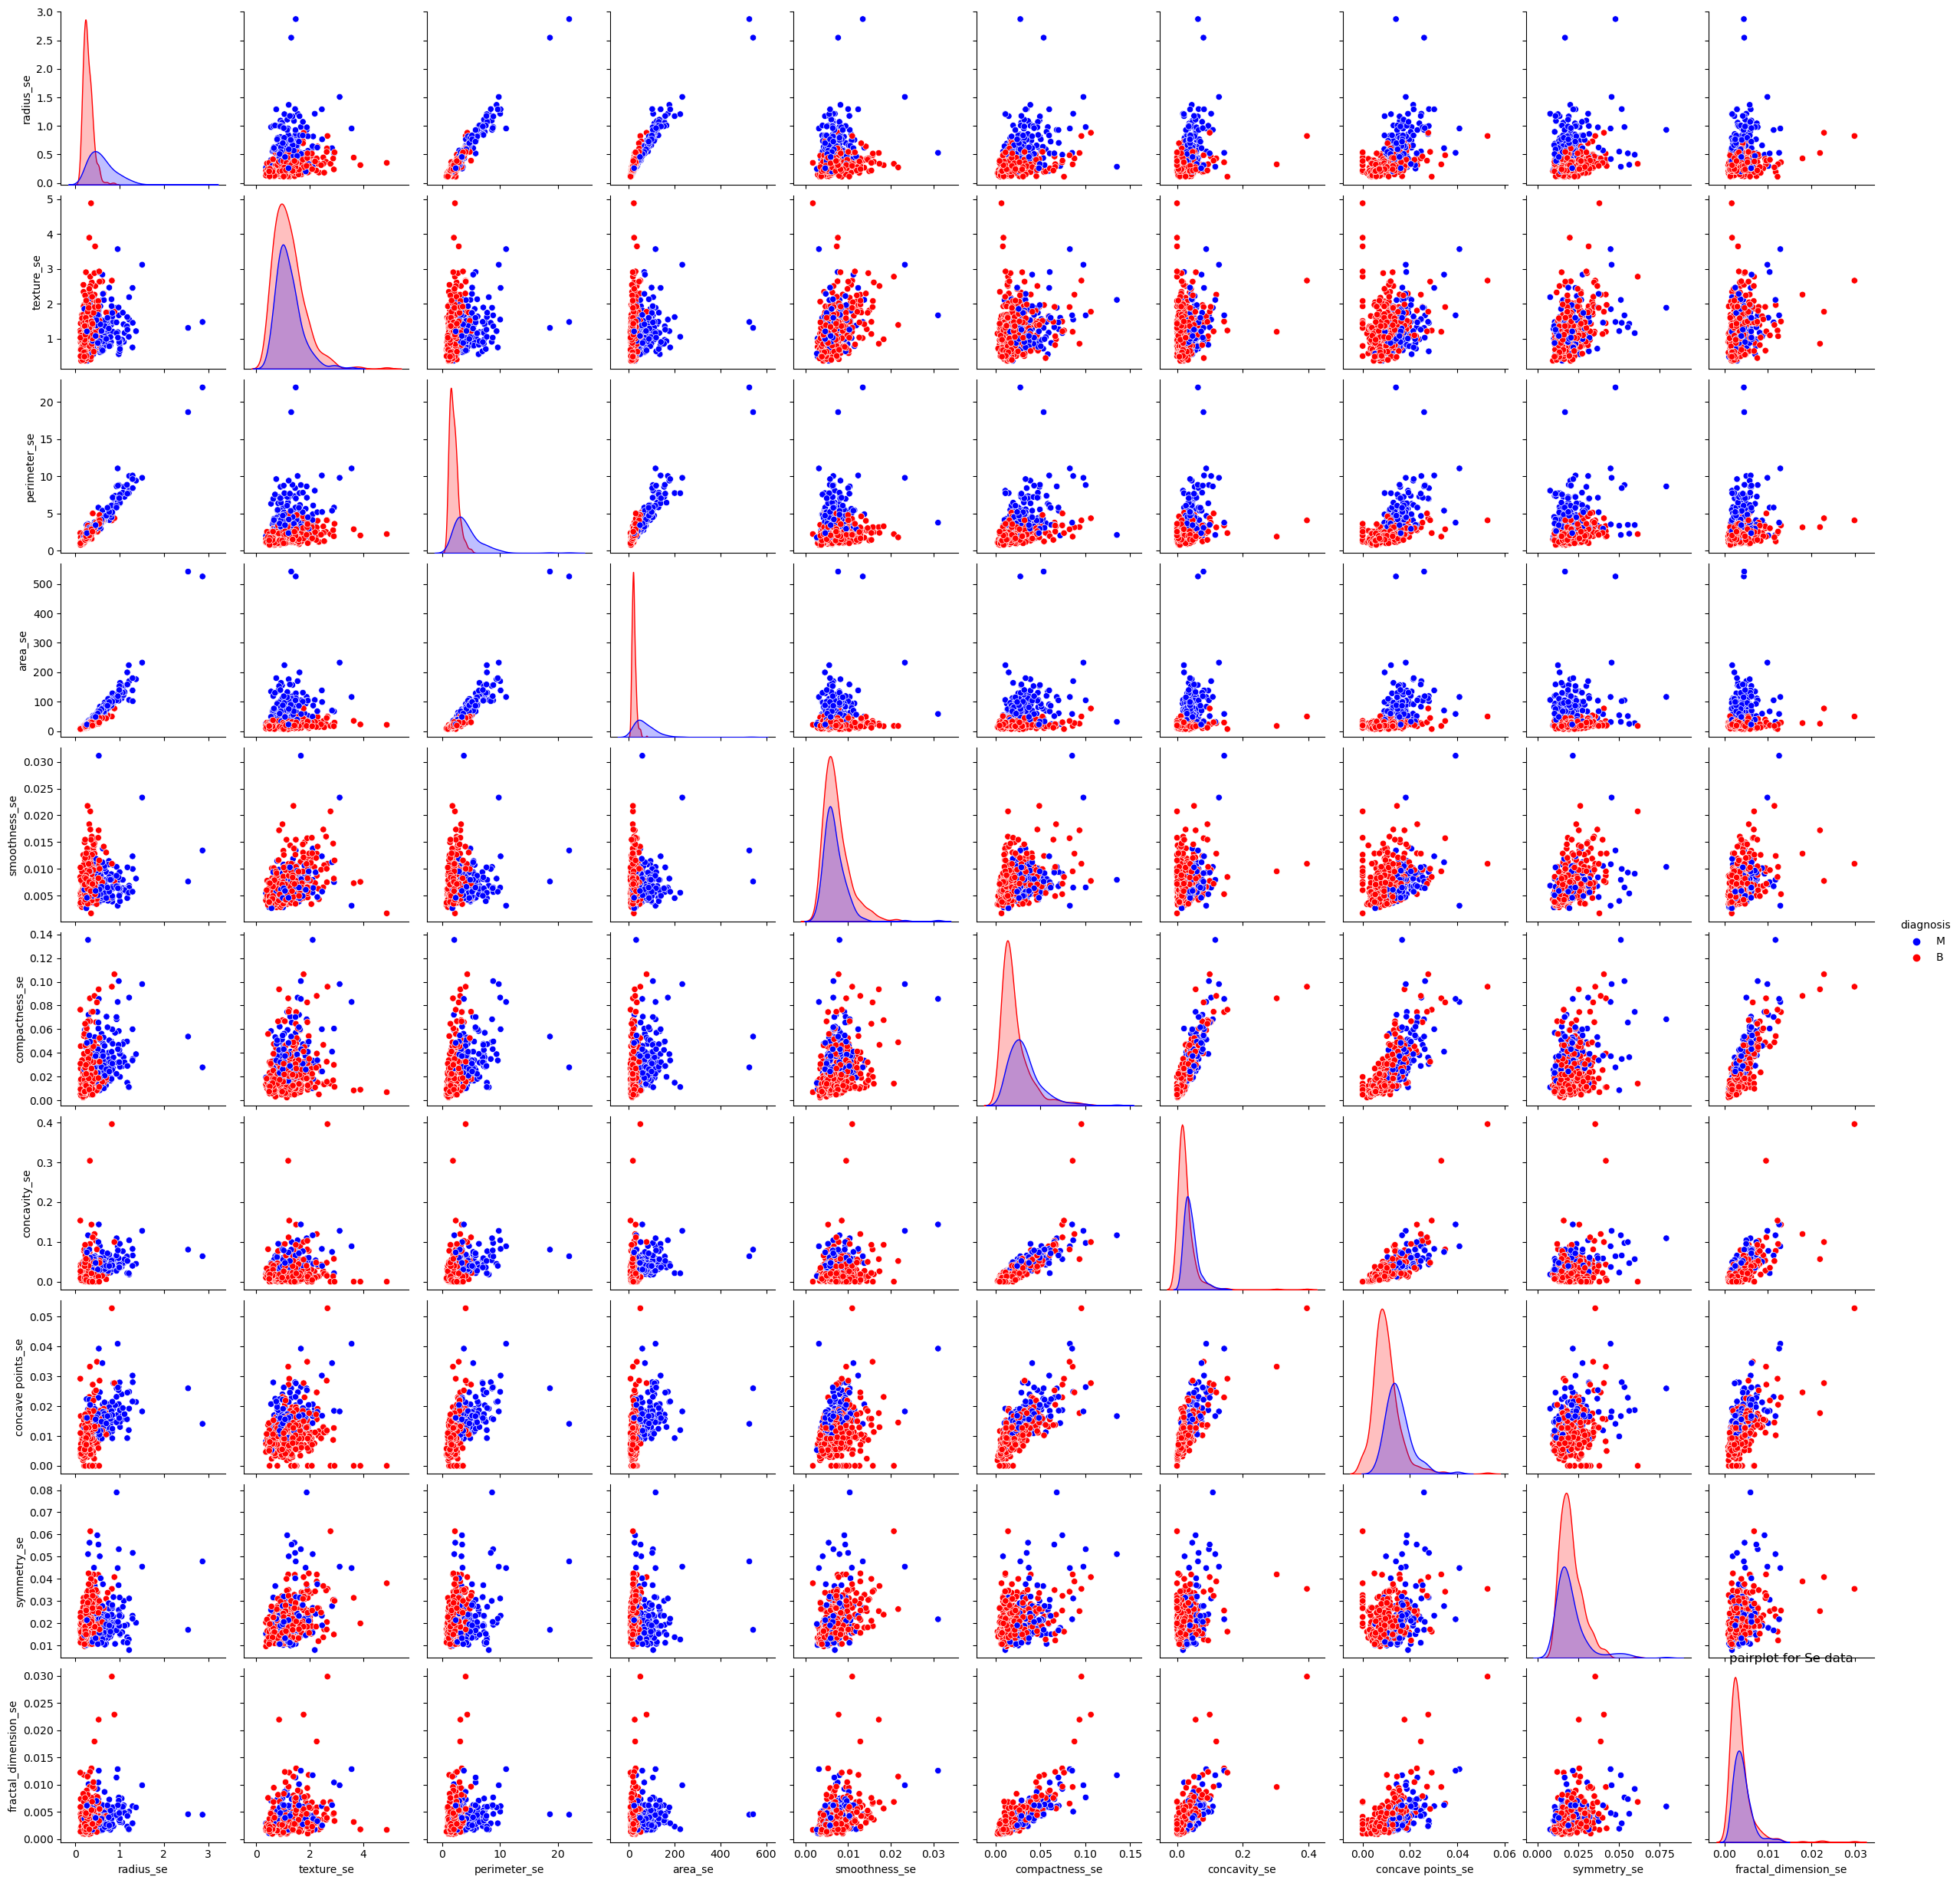

In [23]:
custom_palette = {'B': 'red', 'M': 'blue'}
plt.figure(figsize=(10, 8))
sns.pairplot(sedata,hue='diagnosis',palette=custom_palette)
plt.title("pairplot for Se data")
plt.show()

# Insites:-

- In this plot we can see similar standard of error when comparing datasets with malignant and benign tumours.
- Hence from above plot  we can see both data are  having relatively similar to each other by its  values and ratios.

# Heat map

C:\Users\situ\AppData\Local\Temp\ipykernel_15736\3778204353.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sedata.corr(),cmap='RdBu_r',annot=True)


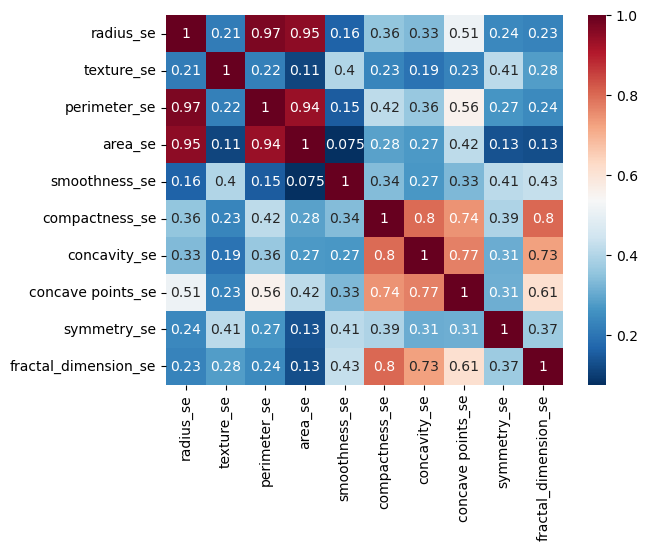

In [24]:
sns.heatmap(sedata.corr(),cmap='RdBu_r',annot=True)
plt.show()

# Insites:-

- The mean data has strong positive correlation with mean values of radius and perimeter.
- Some perimeter are moderately positive corelated with concavity and area, concavity and perimeter etc.
- We see some strong negative correlation between fractal dimension with radius, texture, parameter mean values.

# plot for Worst

In [25]:
col_worst=['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
worstdata=df[col_worst]
worstdata

diagnosis  radius_worst  texture_worst  perimeter_worst  area_worst  \
0           M        25.380          17.33           184.60      2019.0   
1           M        24.990          23.41           158.80      1956.0   
2           M        23.570          25.53           152.50      1709.0   
3           M        14.910          26.50            98.87       567.7   
4           M        22.540          16.67           152.20      1575.0   
..        ...           ...            ...              ...         ...   
564         M        25.450          26.40           166.10      2027.0   
565         M        23.690          38.25           155.00      1731.0   
566         M        18.980          34.12           126.70      1124.0   
567         M        25.740          39.42           184.60      1821.0   
568         B         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[569 rows x 11 columns]

# Histogram

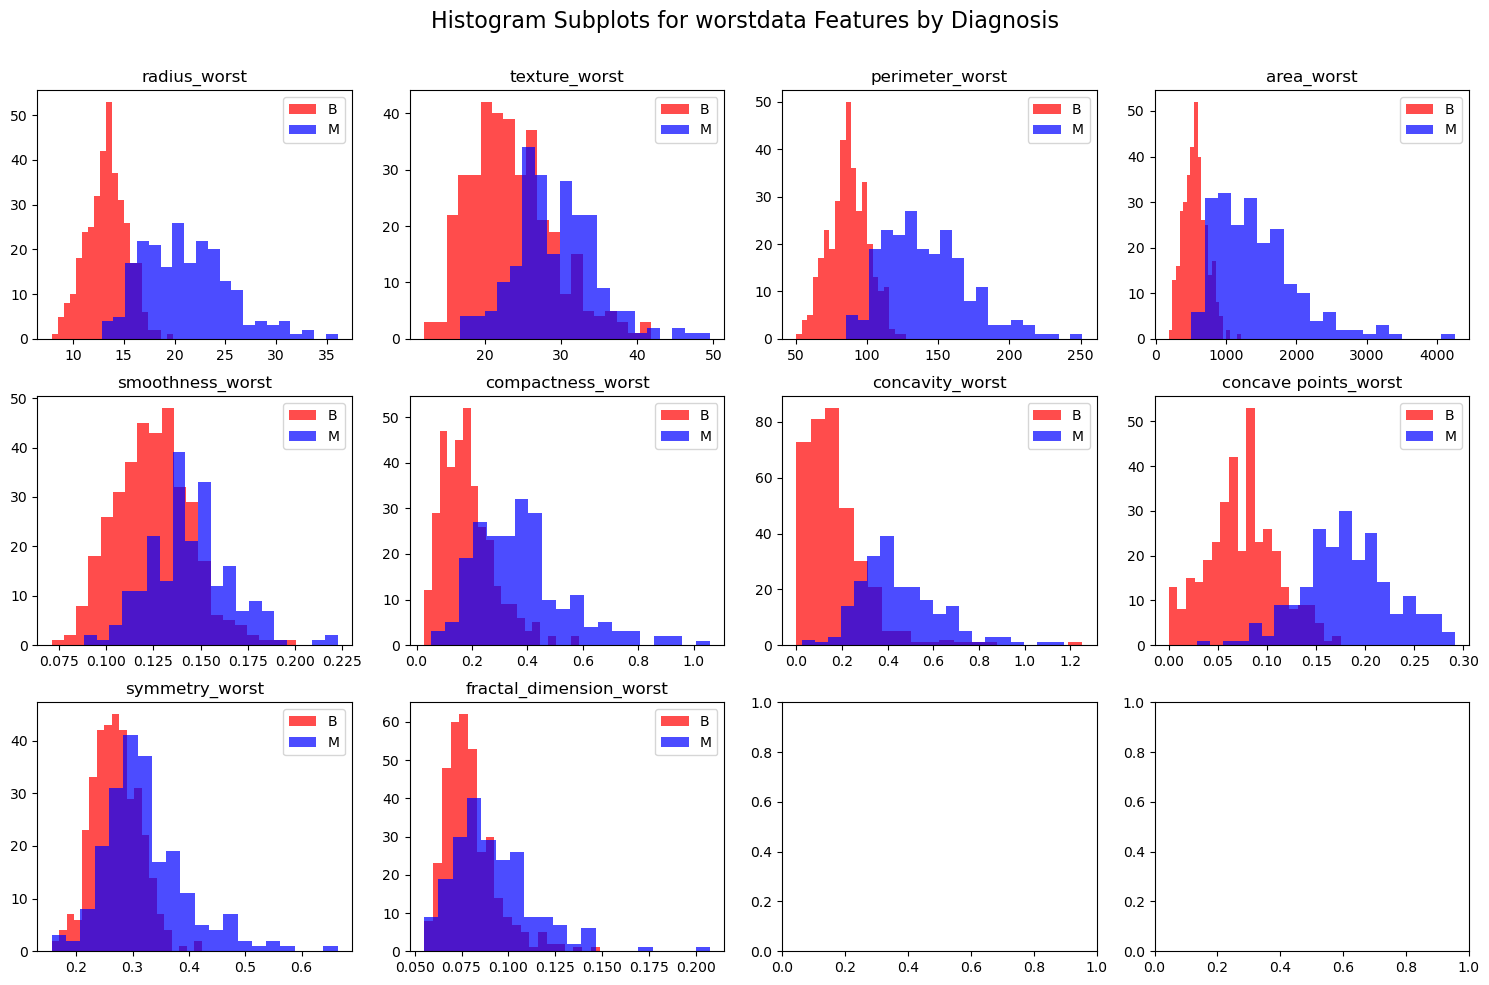

In [26]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Histogram Subplots for worstdata Features by Diagnosis", fontsize=16)
colors = {'B': 'red', 'M': 'blue'}

for i, col in enumerate(worstdata.columns[1:]):
    row = i // 4
    col_num = i % 4

    for diagnosis, color in colors.items():
        subset = worstdata[worstdata['diagnosis'] == diagnosis]
        axs[row, col_num].hist(subset[col], bins=20, color=color, alpha=0.7, label=diagnosis)

    axs[row, col_num].set_title(col)
    axs[row, col_num].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


# Insites:-

- In radius worst plot we can see benign tumor value lies 5-0.19, where as malignant tumor value lies on 14-37. we can say if the radius value is greter than 17 then that patient has 90% chance of maligant tumor.

- In texture worst plot we can see benign tumor value lies 5-42, where as malignant tumor value lies on 15-49.here we can not say if that patient has benign tumor or maligant tumor.

- In perimeter worst plot we can see benign tumor value lies 50-125, where as malignant tumor value lies on 70-250. we can say if the perimeter value is greter than 120 then that patient has 90% chance of maligant tumor.

- In area worst plot we can see benign tumor value lies 150-1200, where as malignant tumor value lies on 600-4200. we can say if the radius value is greter than 900 then that patient has 90% chance of maligant tumor.

- In soomthness worst plot we can see benign tumor value lies 0.006-0.2, where as malignant tumor value lies on 0.085-0.220. we can not say if that patient has benign tumor or maligant tumor.

- In compactness worst plot we can see benign tumor value lies 0.05-0.05, where as malignant tumor value lies on 0.01-1.1. we can not say if that patient has benign tumor or maligant tumor.

- In concavity worst plot we can see benign tumor value lies 0.0-1.2, where as malignant tumor value lies on 0.1-1.9.  we can not say if that patient has benign tumor or maligant tumor.

- In concavepoints worst plot we can see benign tumor value lies 0.0-0.17, where as malignant tumor value lies on 0.04-0.28.we can say if the radius value is greter than 0.14 then that patient has 90% chance of maligant tumor.

- In Symmetry worst plot we can see benign tumor value lies 0.1-0.41, where as malignant tumor value lies on 0.1-0.07. here we can not say if that patient has benign tumor or maligant tumor.

- In fractional dimension worst plot we can see benign tumor value lies 0.060-0.149, where as malignant tumor value lies on 0.060-0.201.  here we can not say if that patient has benign tumor or maligant tumor.

# Pair plot for worst

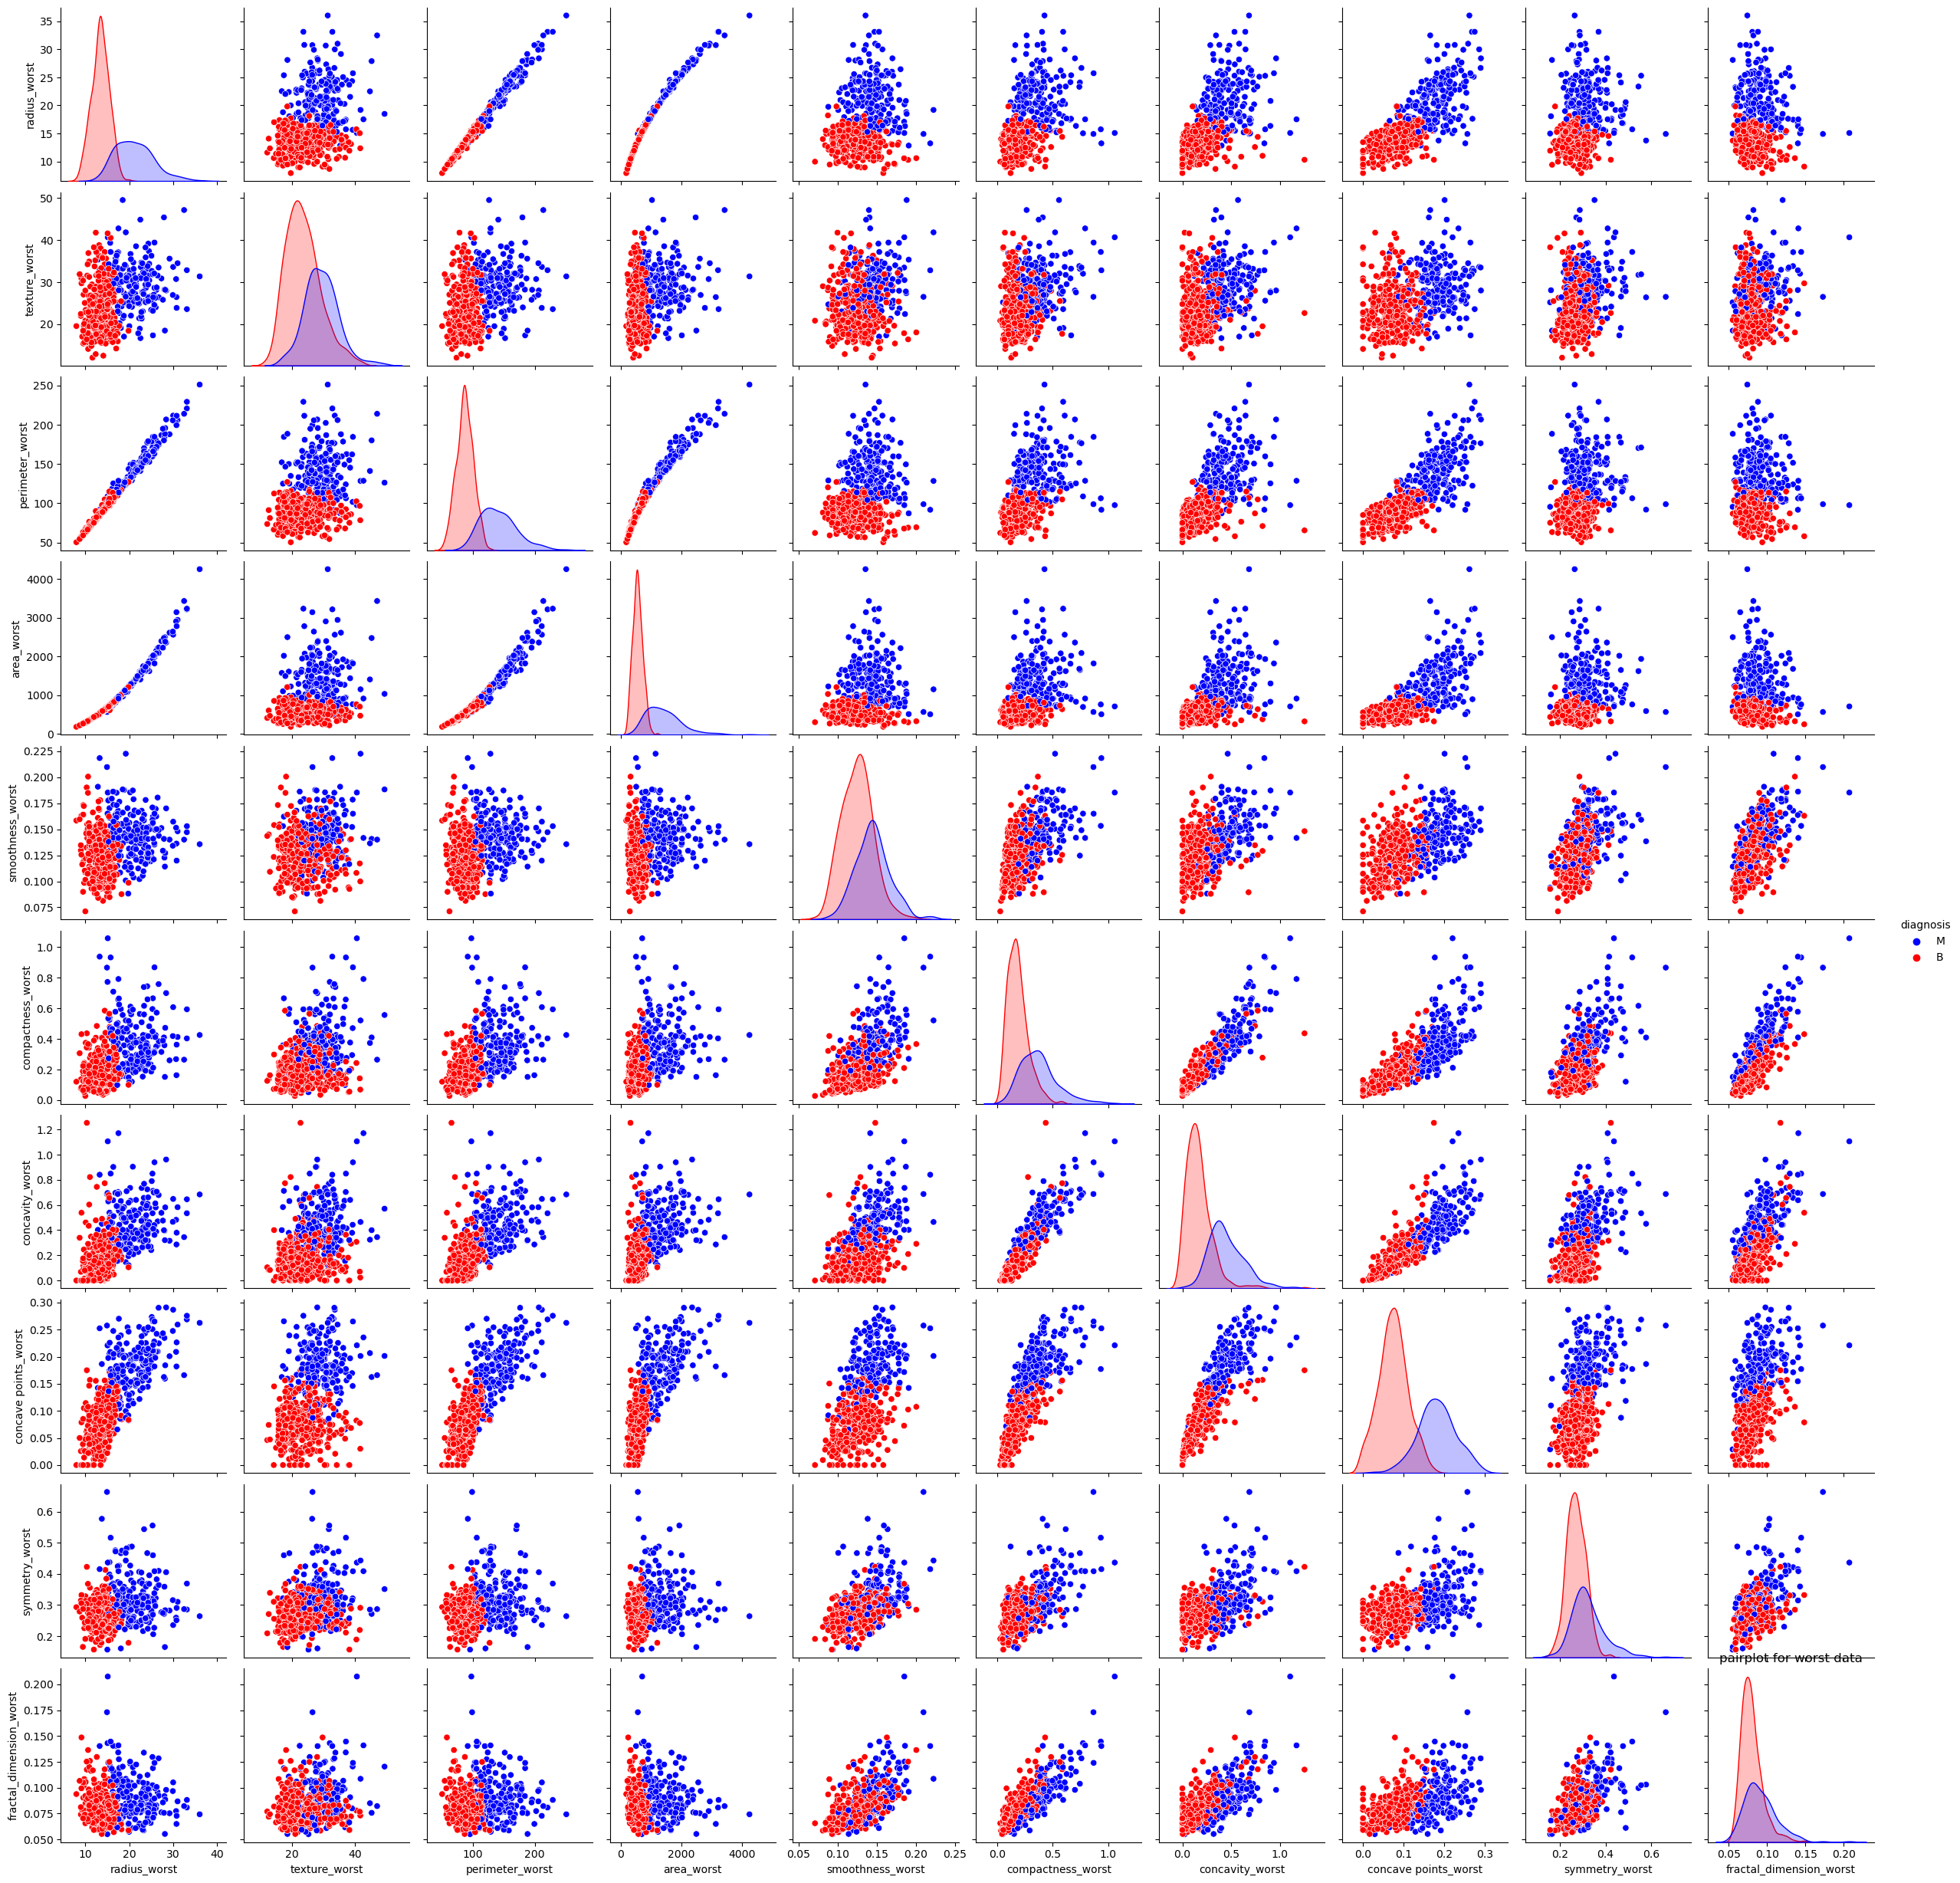

In [27]:
sns.pairplot(worstdata,hue='diagnosis',palette=custom_palette)
plt.title("pairplot for worst data")
plt.show()

# Insites

- The peak for malignant tumour seems to appear more on the right as compared to benign tumours.
- This means that malignant tumour tend to have larger radius, rougher texture, more compactness,concavity and concave points for worst values.

# Heat map

C:\Users\situ\AppData\Local\Temp\ipykernel_15736\3973066053.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(worstdata.corr(),cmap='RdBu_r',annot=True)


<Axes: >

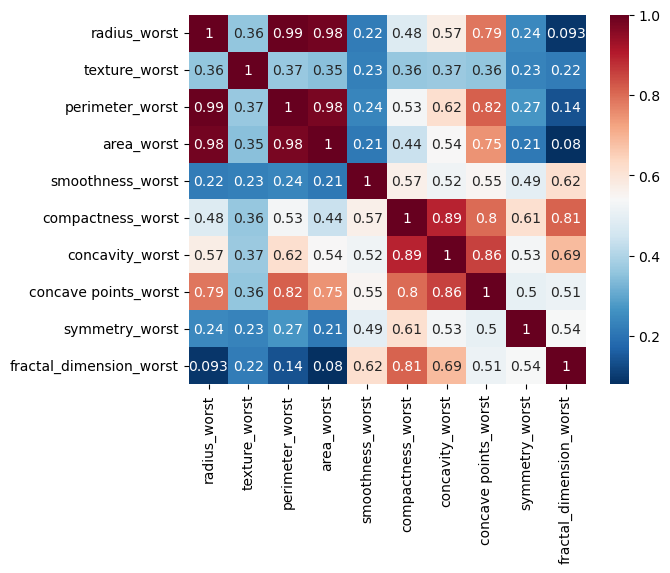

In [28]:
sns.heatmap(worstdata.corr(),cmap='RdBu_r',annot=True)

# Insites


- The worst data has positive correlation with each worst columns.
- In this map we can see the columns are moderately positive correlated with each other where as less values are strongly correlated.


# Pair plot for all columns

In [29]:
# sns.pairplot(df,hue='diagnosis',palette='rocket')
# plt.show()


# Co-relation in Heat Map

In [30]:
# plt.figure(figsize=(25,25))
# sns.heatmap(df.corr(),annot=True)
# plt.show()

# ML-approaches for Breast Cancer Wisconsin (Diagnostic) Data Set

- Set Target Columns 

In [31]:
y=df['diagnosis']
x=df.drop(columns='diagnosis')

- Train and test data 

In [32]:
import sklearn
from sklearn.model_selection import train_test_split

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)

In [34]:
xtrain.shape

(455, 30)

# Feature Scalling

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,r2_score,f1_score

In [36]:
gn=GaussianNB()
rc=RandomForestClassifier()

# LabelEncoder

- due to we have catagorical  target columns we have to  use LabelEncoder

In [37]:
le=LabelEncoder()

In [38]:
le.fit(ytrain)

LabelEncoder()

In [39]:
le.classes_

array(['B', 'M'], dtype=object)

In [40]:
ytrainle=le.transform(ytrain)
ytestle=le.transform(ytest)

In [41]:
ytrainle.shape,ytestle.shape

((455,), (114,))

In [42]:
ytrainle

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

# Standardization

In [43]:
sc=StandardScaler()

In [44]:
xtrainsc=sc.fit_transform(xtrain)
xtestsc=sc.fit_transform(xtest)

In [45]:
xtrainsc.shape,xtestsc.shape

((455, 30), (114, 30))

# 1)applying GaussianNB 

In [46]:
gn.fit(xtrainsc,ytrainle)

GaussianNB()

In [47]:
ypredict=gn.predict(xtestsc)

# Accuracy

In [48]:
accuracy_score(ytestle,ypredict)

0.9210526315789473

# F1 score

In [138]:
f1_score(ytestle,ypredict)

0.9787234042553191

In [49]:
congn=confusion_matrix(ytestle,ypredict)
congn

array([[62,  4],
       [ 5, 43]], dtype=int64)

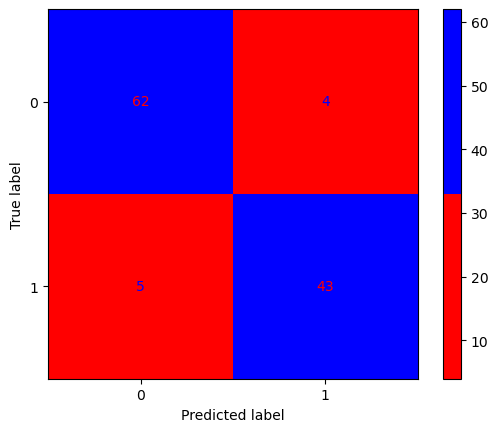

In [50]:
cmap = plt.matplotlib.colors.ListedColormap(['red','blue'])
cm=ConfusionMatrixDisplay(congn)
cm.plot(cmap=cmap, values_format='d')


# 2)applying RandomForestClassifier

In [51]:
rc.fit(xtrainsc,ytrainle)

RandomForestClassifier()

In [52]:
ypredictrandom=rc.predict(xtestsc)

# Accuracy

In [53]:
accuracy_score(ytestle,ypredictrandom)

0.9736842105263158

# F1 score

In [139]:
f1_score(ytestle,ypredictrandom)

0.967741935483871

In [54]:
conmatrixrf=confusion_matrix(ytestle,ypredictrandom)
conmatrixrf

array([[66,  0],
       [ 3, 45]], dtype=int64)

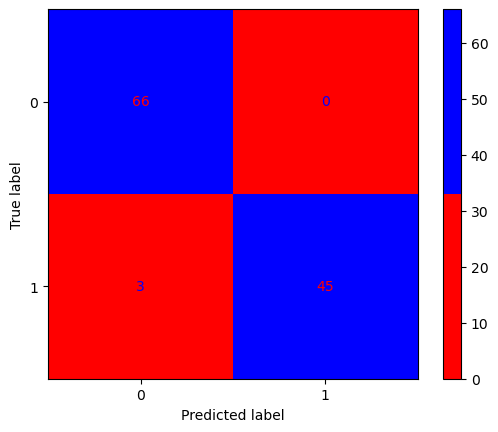

In [55]:
cm=ConfusionMatrixDisplay(conmatrixrf)
cm.plot(cmap=cmap, values_format='d')

# 4)Gradient Boosted Model (GBM)

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
gbc=GradientBoostingClassifier()

In [58]:
gbc.fit(xtrainsc,ytrainle)

GradientBoostingClassifier()

In [59]:
ypred=gbc.predict(xtestsc)

# Accuracy

In [60]:
accuracy_score(ytestle,ypred)

0.956140350877193

# F1 score

In [141]:
f1_score(ytestle,ypred)

0.967741935483871

In [61]:
conmatrix=confusion_matrix(ytestle,ypred)
conmatrix

array([[63,  3],
       [ 2, 46]], dtype=int64)

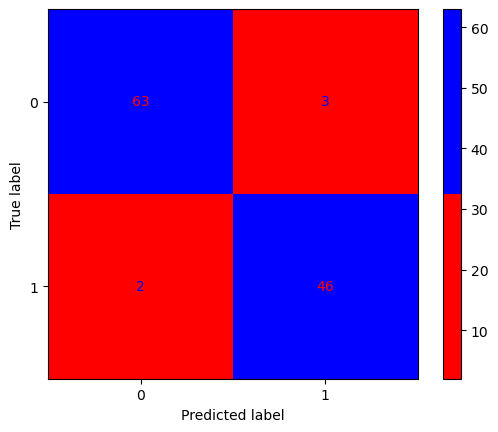

In [62]:
cm=ConfusionMatrixDisplay(conmatrix)
cm.plot(cmap=cmap)

# 4)Applying SVC model


In [63]:
from sklearn.svm import SVC

In [64]:
sc=SVC()

In [65]:
sc.fit(xtrainsc,ytrainle)

SVC()

In [66]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

In [67]:
ypred=sc.predict(xtestsc)

# Accuracy

In [68]:
accuracy_score(ytestle,ypred)

0.9736842105263158

# F1 score

In [142]:
f1_score(ytestle,ypred)

0.967741935483871

In [69]:
conmatrix=confusion_matrix(ytestle,ypred)
conmatrix

array([[66,  0],
       [ 3, 45]], dtype=int64)

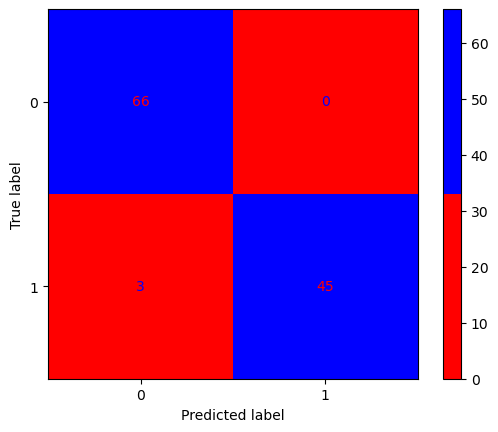

In [70]:
cm=ConfusionMatrixDisplay(conmatrix)
cm.plot(cmap=cmap)

# 5)Logistic regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lor=LogisticRegression()

In [73]:
lor.fit(xtrainsc,ytrainle)

LogisticRegression()

In [74]:
ypredict = lor.predict(xtestsc)

# Accuracy

In [75]:
accuracy_score(ytestle,ypredict)

0.9824561403508771

# F1 score

In [143]:
f1_score(ytestle,ypredict)

0.9787234042553191

In [76]:
conmatrixknnlor=confusion_matrix(ytestle,ypredict)
conmatrixknnlor

array([[66,  0],
       [ 2, 46]], dtype=int64)

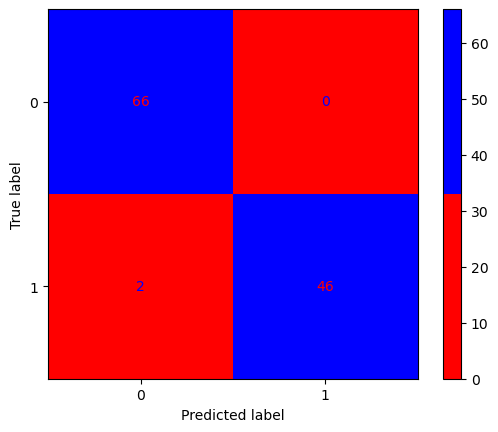

In [77]:
cm=ConfusionMatrixDisplay(conmatrixknnlor)
cm.plot(cmap=cmap, values_format='d')

# 6)Decision tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dtc=DecisionTreeClassifier()

In [80]:
dtc.fit(xtrainsc,ytrainle)

DecisionTreeClassifier()

In [81]:
ypredc=dtc.predict(xtestsc)

# Accuracy

In [82]:
accuracy_score(ytestle,ypredc)

0.9473684210526315

# F1 score

In [144]:
f1_score(ytestle,ypredc)

0.9347826086956522

In [83]:
confusedtc=confusion_matrix(ytestle,ypredc)
confusedtc

array([[65,  1],
       [ 5, 43]], dtype=int64)

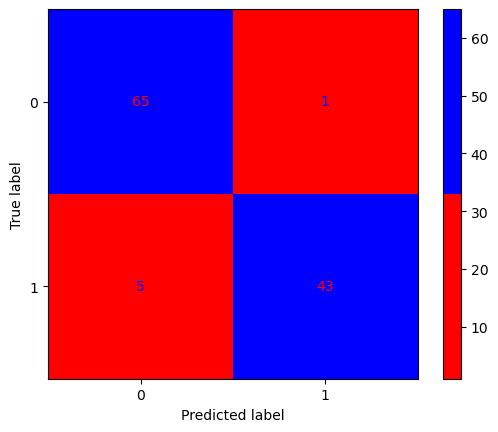

In [84]:
cm=ConfusionMatrixDisplay(confusedtc)
cm.plot(cmap=cmap, values_format='d')

# 7)KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn=KNeighborsClassifier()

In [87]:
knn.fit(xtrainsc,ytrainle)

KNeighborsClassifier()

In [88]:
y_pred = knn.predict(xtestsc)

# Accuracy

In [89]:
accuracy_score(ytestle,y_pred)

0.9736842105263158

# F1 score

In [145]:
f1_score(ytestle,y_pred)

0.967741935483871

In [90]:
conmatrixknn=confusion_matrix(ytestle,y_pred)
conmatrixknn

array([[66,  0],
       [ 3, 45]], dtype=int64)

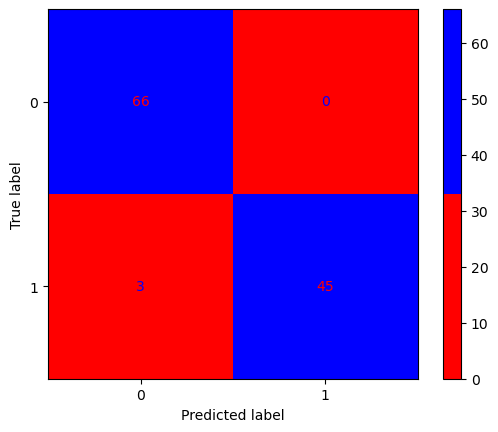

In [91]:
cm=ConfusionMatrixDisplay(conmatrixknn)
cm.plot(cmap=cmap, values_format='d')

# 8)AdaBoostClassifier

In [92]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
ada=AdaBoostClassifier()

In [94]:
ada.fit(xtrainsc,ytrainle)

AdaBoostClassifier()

In [95]:
ypredada=ada.predict(xtestsc)

# Accuracy

In [96]:
accuracy_score(ytestle,ypredada)

0.9649122807017544

# F1 score

In [146]:
f1_score(ytestle,ypredada)

0.9574468085106383

In [97]:
conada=confusion_matrix(ytestle,ypredada)
conada

array([[65,  1],
       [ 3, 45]], dtype=int64)

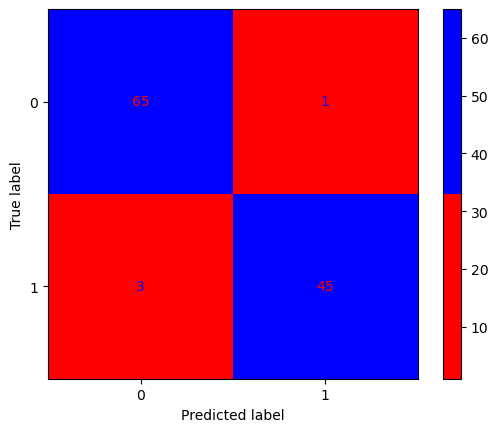

In [98]:
cm=ConfusionMatrixDisplay(conada)
cm.plot(cmap=cmap, values_format='d')

# Using Normalization

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
ms=MinMaxScaler()

In [101]:
xtrainms=ms.fit_transform(xtrain)
xtestms=ms.fit_transform(xtest)

In [102]:
xtrainms.shape,xtestms.shape

((455, 30), (114, 30))

# Models For Normalization

- applying GaussianNB

In [103]:
gn.fit(xtrainms,ytrainle)

GaussianNB()

In [104]:
ypredict_ms=gn.predict(xtestms)

# Accuracy

In [105]:
accuracy_score(ytestle,ypredict_ms)

0.7894736842105263

In [140]:
f1_score(ytestle,ypredict_ms)

0.8

In [106]:
congn=confusion_matrix(ytestle,ypredict_ms)
congn

array([[42, 24],
       [ 0, 48]], dtype=int64)

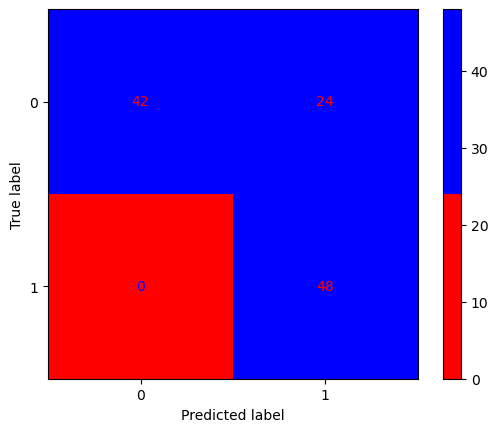

In [107]:
cmap = plt.matplotlib.colors.ListedColormap(['red','blue'])
cm=ConfusionMatrixDisplay(congn)
cm.plot(cmap=cmap, values_format='d')

- applying RandomForestClassifier

In [108]:
rc.fit(xtrainms,ytrainle)

RandomForestClassifier()

In [109]:
ypredict_rc=rc.predict(xtestms)

In [110]:
accuracy_score(ytestle,ypredict_rc)

0.9298245614035088

In [111]:
congn=confusion_matrix(ytestle,ypredict_rc)
congn

array([[58,  8],
       [ 0, 48]], dtype=int64)

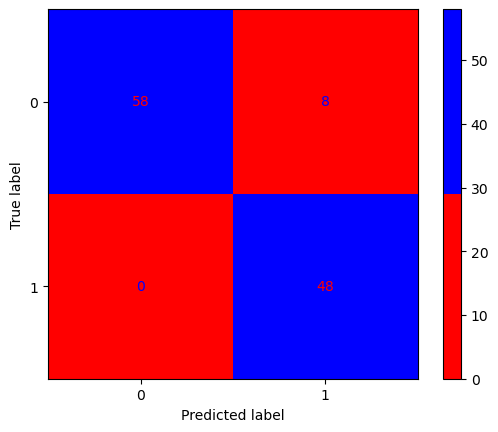

In [112]:
cmap = plt.matplotlib.colors.ListedColormap(['red','blue'])
cm=ConfusionMatrixDisplay(congn)
cm.plot(cmap=cmap, values_format='d')

- Gradient Boosted Model (GBM)

In [113]:
gbc.fit(xtrainms,ytrainle)

GradientBoostingClassifier()

In [114]:
ypredict_gbc=gbc.predict(xtestms)

In [115]:
accuracy_score(ytestle,ypredict_gbc)

0.8245614035087719

In [116]:
congn=confusion_matrix(ytestle,ypredict_gbc)
congn

array([[46, 20],
       [ 0, 48]], dtype=int64)

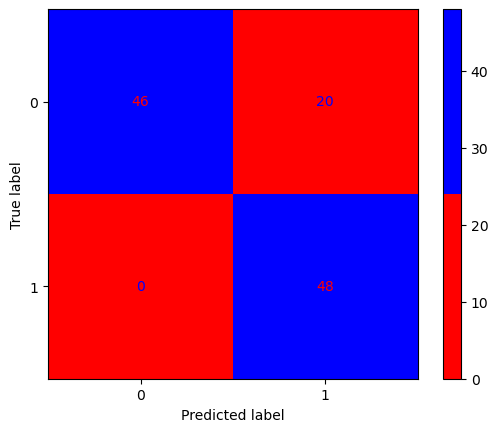

In [117]:
cmap = plt.matplotlib.colors.ListedColormap(['red','blue'])
cm=ConfusionMatrixDisplay(congn)
cm.plot(cmap=cmap, values_format='d')

- Logistic regression

In [118]:
lor.fit(xtrainms,ytrainle)

LogisticRegression()

In [119]:
ypredict_lorn=lor.predict(xtestms)

In [120]:
accuracy_score(ytestle,ypredict_lorn)

0.9824561403508771

In [121]:
congn=confusion_matrix(ytestle,ypredict_lorn)
congn

array([[65,  1],
       [ 1, 47]], dtype=int64)

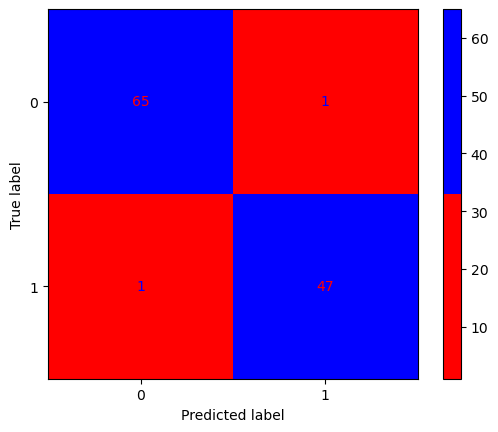

In [122]:
cmap = plt.matplotlib.colors.ListedColormap(['red','blue'])
cm=ConfusionMatrixDisplay(congn)
cm.plot(cmap=cmap, values_format='d')

- Decision tree

In [123]:
dtc.fit(xtrainms,ytrainle)

DecisionTreeClassifier()

In [124]:
ypre_dtc=dtc.predict(xtestms)

In [125]:
accuracy_score(ytestle,ypre_dtc)

0.8333333333333334

In [126]:
congn=confusion_matrix(ytestle,ypre_dtc)
congn

array([[48, 18],
       [ 1, 47]], dtype=int64)

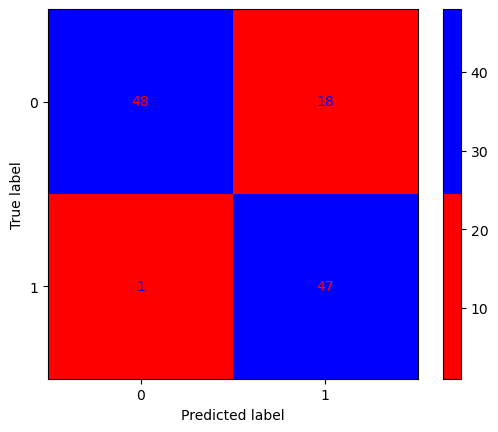

In [127]:
cmap = plt.matplotlib.colors.ListedColormap(['red','blue'])
cm=ConfusionMatrixDisplay(congn)
cm.plot(cmap=cmap, values_format='d')

- KNN

In [128]:
knn.fit(xtrainms,ytrainle)

KNeighborsClassifier()

In [129]:
ypre_knn=knn.predict(xtestms)

In [130]:
accuracy_score(ytestle,ypre_knn)

0.9824561403508771

In [131]:
conmatrixknn=confusion_matrix(ytestle,ypre_knn)
conmatrixknn

array([[65,  1],
       [ 1, 47]], dtype=int64)

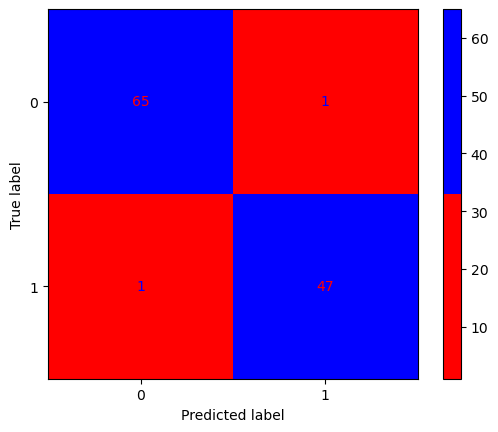

In [132]:
cm=ConfusionMatrixDisplay(conmatrixknn)
cm.plot(cmap=cmap, values_format='d')

- AdaBoostClassifier

In [133]:
ada.fit(xtrainms,ytrainle)

AdaBoostClassifier()

In [134]:
ypre_ada=ada.predict(xtestms)

In [135]:
accuracy_score(ytestle,ypre_ada)

0.8333333333333334

In [136]:
conadan=confusion_matrix(ytestle,ypre_ada)
conada

array([[65,  1],
       [ 3, 45]], dtype=int64)

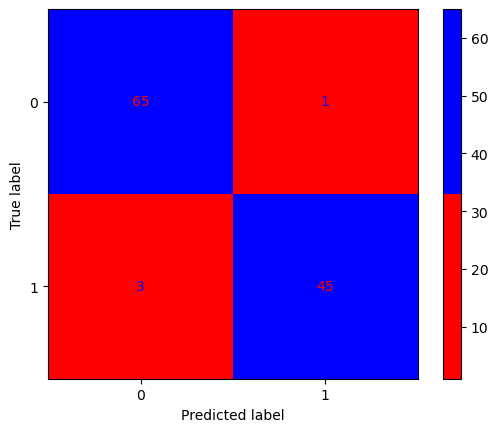

In [137]:
cm=ConfusionMatrixDisplay(conada)
cm.plot(cmap=cmap, values_format='d')